This document has functions to run stats on the summary stats for comms, performance, and cohesion scores

# STEP 1: Visualise the data 

- plot distribution 
- do this for (a) match outcome, (b), kills per minute (per team), (c) communication frequency (words per minute; per team), (d) communication distribution (variance; per team)



In [1]:
# import the data

import pandas as pd

full_summary_stats_df = pd.read_csv('/Users/ett506/Documents/proj-league/data/full_team_log.csv')

full_summary_stats_df

,team_number,team_size,match_id,outcome,match_outcome,duration_seconds,match_duration,kills_per_minute,mean_wpm,variance_wpm,...,cohesion_50_percent,cohesion_75_percent,cohesion_max,satisfaction_mean,satisfaction_std,satisfaction_min,satisfaction_25_percent,satisfaction_50_percent,satisfaction_75_percent,satisfaction_max
0,1,3,5056494058,l,0,1509.8,25:15:00,0.713,71.615385,1152.159763,...,6.000000,6.250000,6.500000,6.166667,0.803638,5.25,5.875,6.50,6.625,6.75
1,2,5,5064844365,w,1,1778.1,29:39:00,1.484,84.233333,803.912222,...,6.000000,6.000000,6.833333,6.700000,0.325960,6.25,6.500,6.75,7.000,7.00
2,3,3,5081077877,w,1,1599.8,26:40:00,0.862,114.666667,1561.111111,...,6.666667,6.750000,6.833333,6.916667,0.144338,6.75,6.875,7.00,7.000,7.00
3,4,5,5060243044,w,1,1388.6,23:08:00,1.470,100.500000,858.500000,...,5.833333,6.166667,6.166667,6.200000,0.647109,5.50,5.750,6.00,6.750,7.00
4,5,5,5062654604,l,1,1175.9,33:04:00,0.877,132.100000,1205.790000,...,6.833333,7.000000,7.000000,6.800000,0.447214,6.00,7.000,7.00,7.000,7.00
5,6,3,5064350747,w,0,1827.3,19:35:00,1.532,104.483871,1455.152966,...,2.666667,3.500000,4.333333,2.583333,0.803638,2.00,2.125,2.25,2.875,3.50
6,7,3,5062628707,l,0,1932.9,30:27:00,0.920,53.000000,473.090909,...,5.333333,5.666667,6.333333,5.550000,0.410792,5.00,5.250,5.75,5.750,6.00
7,8,3,5074481840,l,0,1828.0,32:13:00,0.962,83.193548,1483.123829,...,6.666667,6.833333,7.000000,6.166667,0.629153,5.50,5.875,6.25,6.500,6.75
8,9,3,5063912089,l,1,2141.4,30:28:00,0.919,96.694444,673.545525,...,6.666667,6.750000,6.833333,6.500000,0.661438,5.75,6.250,6.75,6.875,7.00
9,10,3,5061949934,w,1,1791.7,35:41:00,0.589,115.866667,511.648889,...,6.333333,6.500000,6.833333,6.750000,0.176777,6.50,6.750,6.75,6.750,7.00


## plot the distributions
### What is the distribution of match durations (in seconds)?


mean match duration is:  1691.504 seconds


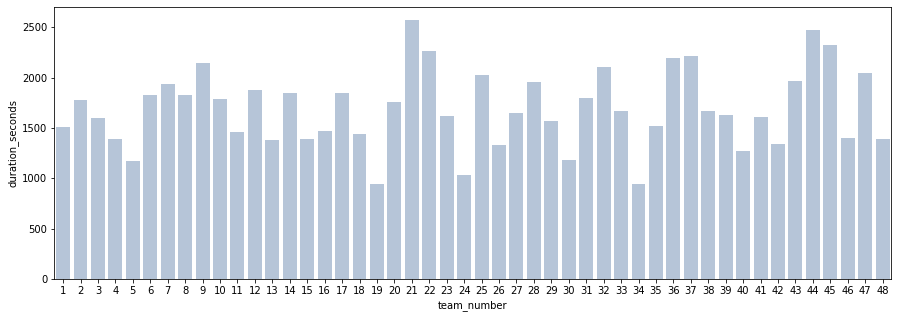

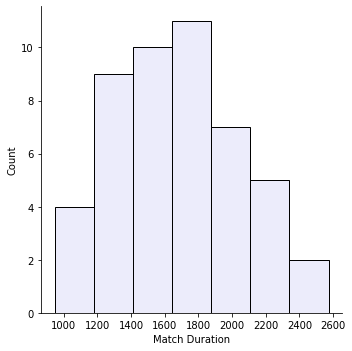

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_match_duration = full_summary_stats_df["duration_seconds"].mean()
print('mean match duration is: ', round(mean_match_duration, 3), "seconds")

# what is the distribution of match duration by team?
f, ax = plt.subplots(figsize= (15, 5)) # set the size of the graph so all team numbers can be seen
sns.barplot(data = full_summary_stats_df, y = "duration_seconds", x = "team_number", color = "lightsteelblue") # find colors here "https://matplotlib.org/stable/gallery/color/named_colors.html"

# what is the distribution of the count of match durations?
ax = sns.displot(full_summary_stats_df, x = "duration_seconds", color = "lavender")
ax.set(xlabel = "Match Duration", ylabel = "Count")

#ax.savefig(r"../match-duration.png")

## What is the distribution of kills per minute?

mean kills per minute is:  1.139


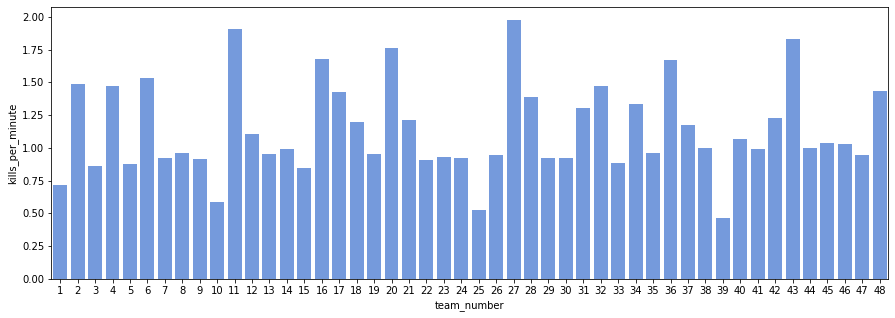

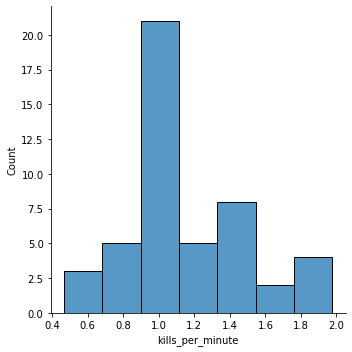

In [13]:
mean_kpm = full_summary_stats_df["kills_per_minute"].mean()
print('mean kills per minute is: ', round(mean_kpm, 3))

# what is the distribution of killsPerMinute by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "kills_per_minute", x = "team_number", color = "cornflowerblue")

# what is the distribution of the count of killsPerMinute?
ax = sns.displot(full_summary_stats_df, x = "kills_per_minute")
#ax.savefig(r"../graphs/kpm-distribution.png")

## What is the duration of communication frequency?


mean words per second across teams is:  85.518


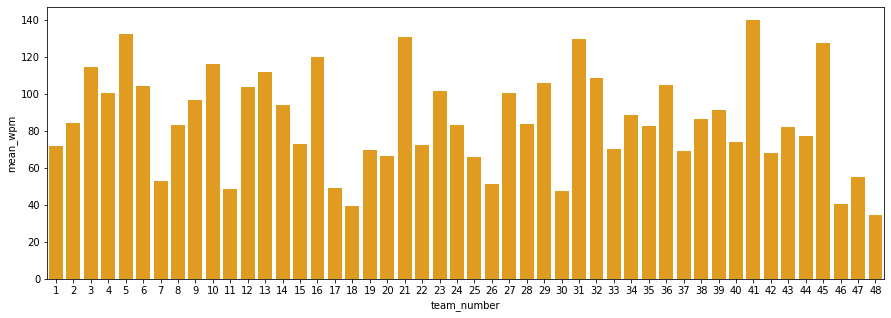

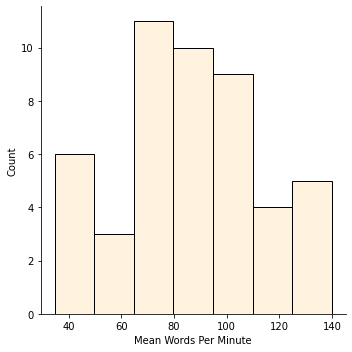

In [14]:
mean_wps = full_summary_stats_df["mean_wpm"].mean()
print('mean words per second across teams is: ', round(mean_wps, 3))

# what is the distribution of killsPerMinute by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "mean_wpm", x = "team_number", color = "orange")

# what is the distribution of the count of killsPerMinute?
ax = sns.displot(full_summary_stats_df, x = "mean_wpm", color = "papayawhip")

ax.set(xlabel = "Mean Words Per Minute", ylabel = "Count")
#ax.savefig(r"../graphs/wpm-distribution.png")


## What is the distribution of communication variance?


mean word variance across teams is:  796.579
outcome
l    914.0
w    758.0
Name: variance_wpm, dtype: float64 3


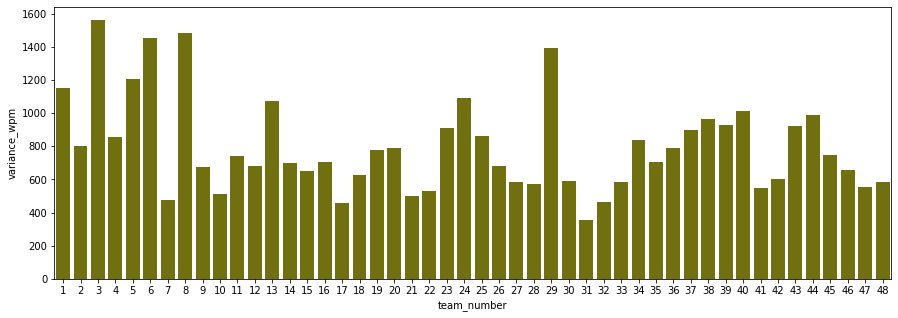

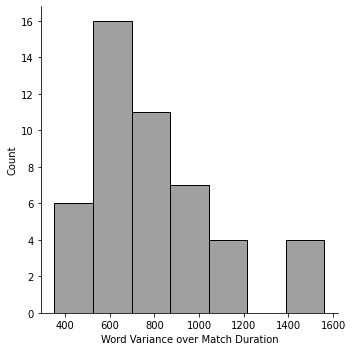

In [15]:
grouped_df = full_summary_stats_df.groupby("outcome")
word_variance_by_winning_losing_group = grouped_df["variance_wpm"].mean()
mean_word_variance = full_summary_stats_df["variance_wpm"].mean()

print('mean word variance across teams is: ', round(mean_word_variance, 3))

print(round(word_variance_by_winning_losing_group), 3)

# mean variance of communication in winning vs losing teams
#word_variance_in_winning_teams = 
#word_variance_in_losing_teams = 

# what is the distribution of killsPerMinute by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "variance_wpm", x = 'team_number', color = "olive")


# what is the distribution of the count of killsPerMinute?
ax = sns.displot(full_summary_stats_df, x = "variance_wpm", color = "grey")
ax.set(xlabel = "Word Variance over Match Duration", ylabel = "Count")
#ax.savefig(r"../graphs/variance-wpm-distribution.png")

## What is the distribution of wins and losses?


Number of teams that won:  36
Number of teams that lost:  12


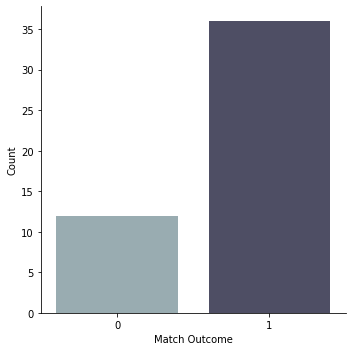

In [16]:
# what is the number of wins and losses?
number_of_wins = full_summary_stats_df["match_outcome"].sum()

print("Number of teams that won: ", number_of_wins)
print("Number of teams that lost: ", (48 - number_of_wins))


# what is the distribution of the count of match outcome?
ax = sns.catplot(data = full_summary_stats_df, x = "match_outcome", kind = "count",  palette = "bone_r")
ax.set(xlabel = "Match Outcome", ylabel = "Count")
#ax.savefig(r"../graphs/match-outcome-distribution.png")

### is this difference in wins and losses significant?
- run chi squared test to find out


In [17]:
import scipy.stats as stats

# observed loss = 12 wins = 36
observed = [12, 36]

# expected loss = 24, wins = 24
expected = [24, 24]

# perform chisquare goodness of fit test 
chisquare = stats.chisquare(f_obs=observed, f_exp=expected)

# get degrees of freedom (n categories-1)
dof = 2 - 1
print(chisquare)
print('dof:', dof)


Power_divergenceResult(statistic=12.0, pvalue=0.0005320055051392492)
dof: 1


## What is the distribution of Cohesion means?

mean level of cohesion:  6.071


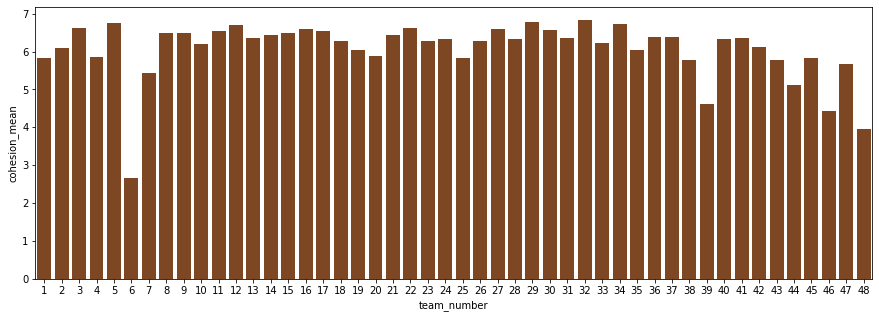

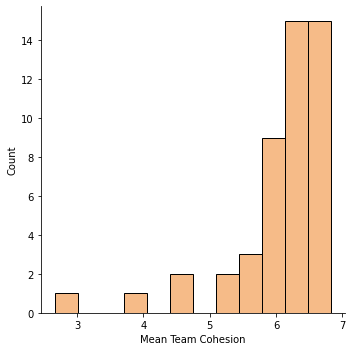

In [18]:
mean_cohesion_of_group = full_summary_stats_df["cohesion_mean"].mean() #cohesion is scored on 7-point scale
print('mean level of cohesion: ', round(mean_cohesion_of_group, 3))

# what is the distribution of killsPerMinute by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "cohesion_mean", x = "team_number", color = "saddlebrown")

# what is the distribution of the count of killsPerMinute?
ax = sns.displot(full_summary_stats_df, x = "cohesion_mean", color = "sandybrown")
ax.set(xlabel = "Mean Team Cohesion", ylabel = "Count")
#ax.savefig(r"../graphs/cohesion-mean-distribution.png")

## What is the distribution of cohesion variance?

mean std dev of cohesion:  0.554


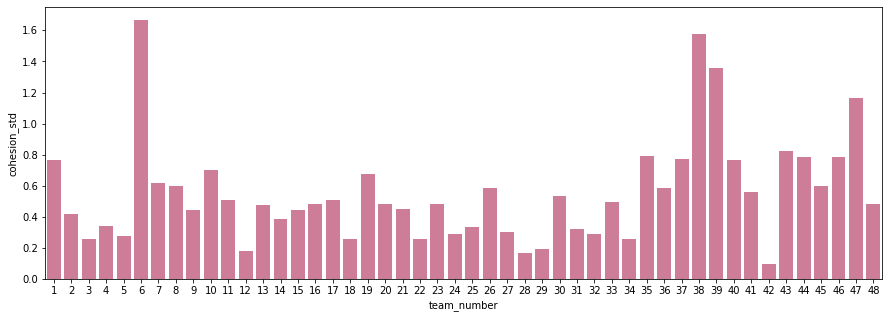

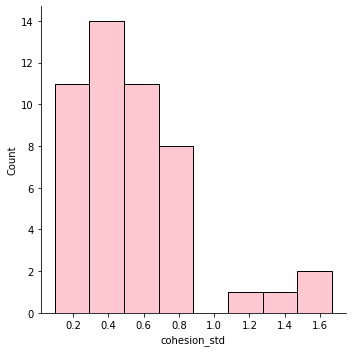

In [19]:
stdev_cohesion_of_group = full_summary_stats_df["cohesion_std"].mean() #cohesion is scored on 7-point scale
print('mean std dev of cohesion: ', round(stdev_cohesion_of_group, 3))

# what is the distribution of killsPerMinute by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "cohesion_std", x = "team_number", color = "palevioletred")

# what is the distribution of the count of killsPerMinute?
sns.displot(full_summary_stats_df, x = "cohesion_std", color = "lightpink")

## What is the distribution of Satisfaction means?

mean level of satisfaction:  6.248


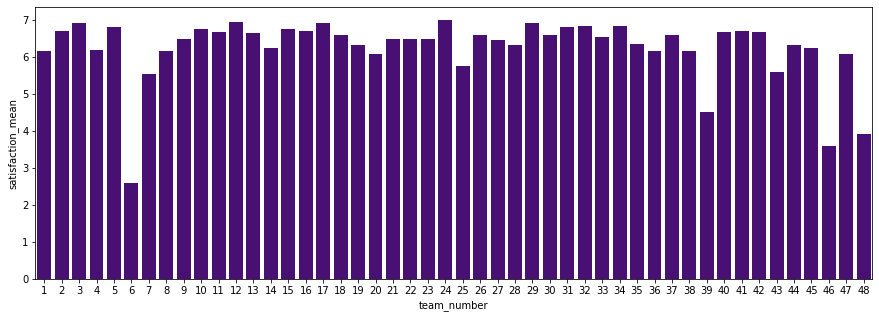

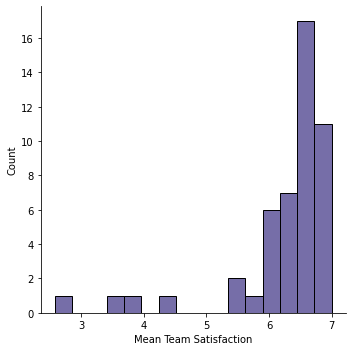

In [21]:
mean_satisfaction_of_group = full_summary_stats_df["satisfaction_mean"].mean() #satisfaction is scored on 7-point scale
print('mean level of satisfaction: ', round(mean_satisfaction_of_group, 3))

# what is the distribution of satisaction scores by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "satisfaction_mean", x = "team_number", color = "indigo")

# what is the distribution of the count of satisfaction means?
ax = sns.displot(full_summary_stats_df, x = "satisfaction_mean", color = "darkslateblue")
ax.set(xlabel = "Mean Team Satisfaction", ylabel = "Count")
#ax.savefig(r"../graphs/satisfaction-mean-distribution.png")

## What is the distribution of Satisfaction standard devs?

mean std dev of satisfaction:  0.457


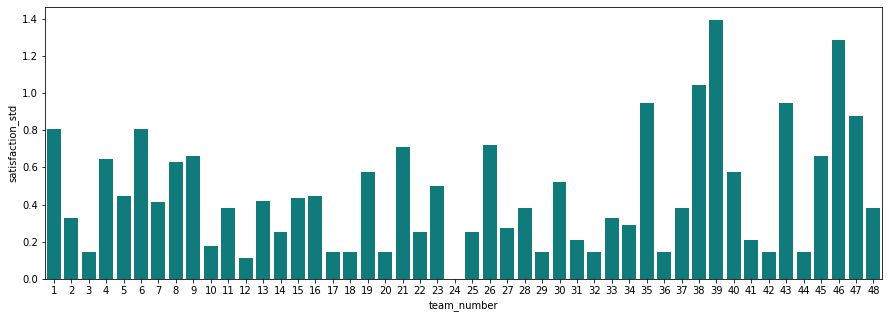

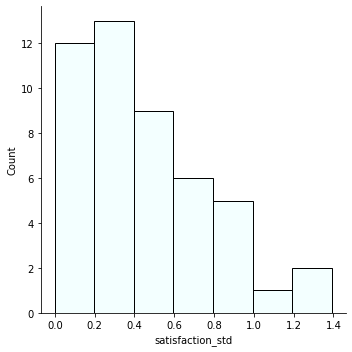

In [22]:
mean_satisfaction_of_group = full_summary_stats_df["satisfaction_std"].mean() #cohesion is scored on 7-point scale
print('mean std dev of satisfaction: ', round(mean_satisfaction_of_group, 3))

# what is the distribution of satisfaction std dev by team?
f, ax = plt.subplots(figsize= (15, 5))
sns.barplot(data = full_summary_stats_df, y = "satisfaction_std", x = "team_number", color = "darkcyan")

# what is the distribution of the count of satisfaction std dev?
sns.displot(full_summary_stats_df, x = "satisfaction_std", color = "azure")

# STEP 2: Visualise the relationship between variables 
- create scatter plots

In [23]:
# based on this tutorial : http://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Communication-Performance Relationship

## What is the relationship between communication frequency (words per minute), kills per minute, and match outcome?



## What is the relationship between communication distribution, kills per minute, and match outcome?



In [ ]:
# relationship between variance in wpm and kpm
ax1 = sns.relplot(data = full_summary_stats_df, x = "varianceOfWords", y = "killsPerMinute")
ax1.set(xlabel = "variance of communication", ylabel = "mean Kills per minute")


# relationship between variance in wpm and match outcome
ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "varianceOfWords", kind = "box")
ax2.set(xlabel = "match outcome", ylabel = "variance of communication")

#### Summary from visualising communication and performance metrics 
-----------------------------------------------------------------------
- winning teams communicate more than losing teams
- but there seems to be no difference in how much communication is distributed within a team 
- looking at the visualisation of communication distribution in the whole sample, communication tends to be more hierarchical
- this initial visualisation suggests that in teams of strangers, having a single leader who is constantly communicating is more effective than having a single leader who doesn't communicate frequently --> will be able to get this info using Otter.ai

# Communication-Cohesion Relationship

## What is the relationship between communication frequency, distribution, and team cohesion?

In [ ]:

# relationship between mean wpm and mean cohesion
ax1 = sns.relplot(data = full_summary_stats_df, x = "meanWordsPerMinute", y = "cohesion_mean")
ax1.set(xlabel = "mean Words per minute", ylabel = "team cohesion")


# relationship between variance of words and mean cohesion
ax2 = sns.relplot(data = full_summary_stats_df, x = "varianceOfWords", y = "cohesion_mean")
ax2.set(xlabel = "distribution of communication in team", ylabel = "team cohesion")

In [ ]:
# jointplot of distribution of variables and their relationships
ax = sns.jointplot(data = full_summary_stats_df, x = "meanWordsPerMinute", y = "cohesion_mean", color = "mediumvioletred")
ax.set_axis_labels( "words per minute", "mean cohesion", fontsize=12)
ax.savefig("jointplot.png")

### calculate the correlation between communication and cohesion
- use this for reference https://realpython.com/numpy-scipy-pandas-correlation-python/

In [24]:
# retrieve column of interest
mean_cohesion_column = full_summary_stats_df.loc[:, "cohesion_mean"]
mean_wpm_column = full_summary_stats_df.loc[:, "mean_wpm"]
dist_communication_column = full_summary_stats_df.loc[:, "variance_wpm"]

# convert column into array
mean_cohesion_array = mean_cohesion_column.values
mean_wpm_array = mean_wpm_column.values
dist_communication_array = dist_communication_column.values


In [25]:
# calculate correlation coefficient matrix

corrcoef_cohesion_and_wpm = np.corrcoef(mean_wpm_array, mean_cohesion_array)
corrcoef_cohesion_and_wordvariance = np.corrcoef(dist_communication_array, mean_cohesion_array)

print("cohesion-wpm: ", corrcoef_cohesion_and_wpm)

print("cohesion-wordvariance: ", corrcoef_cohesion_and_wordvariance)

cohesion-wpm:  [[1.         0.24894556]
 [0.24894556 1.        ]]
cohesion-wordvariance:  [[ 1.         -0.16280953]
 [-0.16280953  1.        ]]


### Pearson's r
- assumptions: For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

In [ ]:
# calculate Pearsons correlation with p value ; for cohesion and wpm

calculate_pearsons_r = scipy.stats.pearsonr(mean_wpm_array, mean_cohesion_array)

print("Pearson's r: ", calculate_pearsons_r[0])
print("p-value: ", calculate_pearsons_r[1])

if calculate_pearsons_r[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

In [ ]:
# calculate Pearsons correlation with p value ; for cohesion and word variance

calculate_pearsons_r = scipy.stats.pearsonr(dist_communication_array, mean_cohesion_array)

print("Pearson's r: ", calculate_pearsons_r[0])
print("p-value: ", calculate_pearsons_r[1])

if calculate_pearsons_r[0] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

### Kendall's tau
- assumptions: monotonicity (the relationship between the two variables follows the general direction), fails the assumptions of pearsons
- https://www.statstest.com/kendalls-tau/

In [26]:
# calculate kendall's tau correlation; for cohesion and wpm
calculate_kendalls_tau = scipy.stats.kendalltau(mean_wpm_array, mean_cohesion_array)

print("kendall's tau: ", calculate_kendalls_tau[0])
print("p-value: ", calculate_kendalls_tau[1])

if calculate_kendalls_tau[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

kendall's tau:  0.24251629826966115
p-value:  0.015909837637913368
Significant correlation found


In [27]:
# calculate kendall's tau correlation; for cohesion and variance of words
calculate_kendalls_tau = scipy.stats.kendalltau(dist_communication_array, mean_cohesion_array)

print("Pearson's r: ", calculate_kendalls_tau[0])
print("p-value: ", calculate_kendalls_tau[1])

if calculate_kendalls_tau[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

Pearson's r:  -0.08680472668692668
p-value:  0.3881541029721799
No significant correlation found


# Cohesion-Performance Relationship

## What is the relationship between cohesion, match outcome, and kills per minute?

In [ ]:
# relationship between variance in mean cohesion and kpm
ax1 = sns.relplot(data = full_summary_stats_df, x = "cohesion_mean", y = "killsPerMinute")
ax1.set(xlabel = "team cohesion", ylabel = "mean Kills per minute")


# relationship between mean cohesion and match outcome
ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "cohesion_mean", kind = "box")
ax2.set(xlabel = "match outcome", ylabel = "team cohesion")

#### Running a logistic regression
- https://realpython.com/logistic-regression-python/
- https://www.pythonfordatascience.org/logistic-regression-python/


In [ ]:
# retrieve column of interest
mean_cohesion_column = full_summary_stats_df.loc[:, "cohesion_mean"]
match_outcome_column = full_summary_stats_df.loc[:, "matchOutcome"]

# convert column into array
mean_cohesion_array = mean_cohesion_column.values
match_outcome_array = match_outcome_column.values
reshaped_mean_cohesion_array = mean_cohesion_array.reshape(-1, 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(reshaped_mean_cohesion_array, match_outcome_array)



In [ ]:
print("intercept: ", model.intercept_)

print("coefficient: ", model.coef_)

In [ ]:
# Each row corresponds to a single observation
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥).
# The second column is the probability that the output is one, or 𝑝(𝑥).

model.predict_proba(reshaped_mean_cohesion_array)

In [ ]:
# actual predictions
model.predict(reshaped_mean_cohesion_array)

In [ ]:
model.score(reshaped_mean_cohesion_array, match_outcome_array)

#### Using Statsmodel to run Logistic Regression

StatsModels formula api uses Patsy to handle passing the formulas. The pseudo code looks like the following:

    smf.logit("dependent_variable ~ independent_variable1 + independent_variable2 + independent_variablen",
            data = df).fit()

To tell the model that a variable is categorical, it needs to be wrapped in C(independent_variable). The pseudo code with a categorical independent variable looks like:

    smf.logit("dependent_variable ~ independent_variable1 + C(independent_variable2)",
            data = df).fit()

By default, Patsy chooses the first categorical variable as the reference category; it's possible to change the reference category if desired. In order to do this, one needs to specify the reference category while one is specifying the variable is a categorical variable. Pseduo code is as follows:

    smf.logit("dependent_variable ~ independent_variable1 + C(independent_variable2, Treatment(categorical_group))",
            data = df).fit()

Where categorical_group is the desired reference group

from https://www.pythonfordatascience.org/logistic-regression-python/

In [ ]:
## Using Statsmodel to run logistic regression
import numpy as np
import statsmodels.api as sm

In [ ]:
# retrieve column of interest
mean_cohesion_column = full_summary_stats_df.loc[:, "cohesion_mean"] # cohesion
match_outcome_column = full_summary_stats_df.loc[:, "matchOutcome"] # match outcome
mean_wpm_column = full_summary_stats_df.loc[:, "meanWordsPerMinute"] # wpm
dist_communication_column = full_summary_stats_df.loc[:, "varianceOfWords"] # word variance

# convert column into array
mean_cohesion_array = mean_cohesion_column.values
match_outcome_array = match_outcome_column.values
mean_wpm_array = mean_wpm_column.values
dist_communication_array = dist_communication_column.values

# need to reshape the independent variables (Step 1)
reshaped_mean_cohesion_array = mean_cohesion_array.reshape(-1, 1)
reshaped_dist_communication_array = dist_communication_array.reshape(-1, 1)
reshaped_mean_wpm_array = mean_wpm_array.reshape(-1, 1)

# need to reshape the independent variables (Step 2)
# add_constant() takes the array x as the argument and returns a new array with the additional column of ones. 
reshaped_mean_cohesion_array = sm.add_constant(reshaped_mean_cohesion_array)
reshaped_dist_communication_array = sm.add_constant(dist_communication_array)
reshaped_mean_wpm_array = sm.add_constant(reshaped_mean_wpm_array)




In [ ]:
# create your model
model_cohesion_outcome = sm.Logit(match_outcome_array, reshaped_mean_cohesion_array)

model_communication_outcome = sm.Logit(match_outcome_array, reshaped_mean_wpm_array)



In [ ]:
# ‘Iterations‘ refer to the number of times the model iterates over the data, trying to optimise the model. 
# By default, the maximum number of iterations performed is 35, after which the optimisation fails
# from https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

# fit with existing data
result_cohesion_outcome = model_cohesion_outcome.fit(method='newton')

result_communication_outcome = model_communication_outcome.fit(method='newton')

In [ ]:
# get the values of the intercept and coefficient 
# remember b0 is intercept, b1(or n) is coefficient/slope
model_results_cohesion_outcome = result_cohesion_outcome.params # cohesion
print("intercept: ", model_results_cohesion_outcome[0])
print("coef: ", model_results_cohesion_outcome[1])

In [ ]:
model_results_communication_outcome = result_communication_outcome.params # communication
print("intercept: ", model_results_communication_outcome[0])
print("coef: ", model_results_communication_outcome[1])

_cohesion-outcome_

In [ ]:

# evaluate the model
# use *result* to obtain the probabilities of the predicted outputs being equal to one
print("probabilities: ", result_cohesion_outcome.predict(reshaped_mean_cohesion_array))

print("\n") # new line for easier readability

# you can use the values from .predict() to get the actual predicted outputs
print("predicted actual outputs: ", (result_cohesion_outcome.predict(reshaped_mean_cohesion_array) >= 0.5).astype(int))


In [ ]:
result_cohesion_outcome.summary()


In [ ]:
# convert log odds to odds ratio for easier interpretation
cohesion_outcome_model_odds = pd.DataFrame(np.exp(result_cohesion_outcome.params), columns= ['OR'])
cohesion_outcome_model_odds['z-value']= result_cohesion_outcome.pvalues
cohesion_outcome_model_odds[['2.5%', '97.5%']] = np.exp(result_cohesion_outcome.conf_int())

cohesion_outcome_model_odds

_communication-outcome_

In [ ]:
# evaluate the model
# use *result* to obtain the probabilities of the predicted outputs being equal to one
print("probabilities: ", result_communication_outcome.predict(reshaped_mean_wpm_array))

print("\n") # new line for easier readability

# you can use the values from .predict() to get the actual predicted outputs
print("predicted actual outputs: ", (result_communication_outcome.predict(reshaped_mean_wpm_array) >= 0.5).astype(int))

#### get some summary stats on the logistic regression model 
- coef : the coefficients of the independent variables in the regression equation. 
- Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
- LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
- Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
- https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

__question__: what is the difference between summary and summary2?

In [ ]:
result_communication_outcome.summary()

In [ ]:
# convert log odds to odds ratio for easier interpretation
communication_outcome_model_odds = pd.DataFrame(np.exp(result_communication_outcome.params), columns= ['OR'])
communication_outcome_model_odds['z-value']= result_communication_outcome.pvalues
communication_outcome_model_odds[['2.5%', '97.5%']] = np.exp(result_communication_outcome.conf_int())

communication_outcome_model_odds